In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../Raw_Dataset/RawDataset2.csv')

df

Unnamed: 0                                          Groserias  Vulgar  \
0              0  @alitomorenoc @ciudadanochi VALV pinche doblad...       1   
1              1  @AlexaStyy Alfin alguien lo dijo que se joda e...       1   
2              2                                Pinché pendejo neta       1   
3              3       Pinche clima estaba soleado hace 15 min. ª 🙃       1   
4              4  Siento que mañana no más me va a hervir la pin...       1   
...          ...                                                ...     ...   
6042        6042  Cállate el hocicoooooooooo 😍😍😍 https://t.co/z5...       0   
6043        6043            @09_alvaro_ callate ya si fue una calle       0   
6044        6044  @Neltiagoeditsss @IsabelaOrtega15 @leslie_18or...       1   
6045        6045                    @JosAlbertGlezS Ay tú cállate 😒       0   
6046        6046  @jgnaredo Ayyyyyy por favor ya dejen lo de Fri...       1   

      Agresivo  Ofensivo  
0            0         1  
1            1         1  
2            0         1  
3            0         0  
4            1         0  
...        ...       ...  
6042         1         0  
6043         0         0  
6044         1         0  
6045         1         0  
6046         1         0  

[6047 rows x 5 columns]

In [4]:
df = df.drop(columns=['Unnamed: 0', 'Agresivo'])
df

Groserias  Vulgar  Ofensivo
0     @alitomorenoc @ciudadanochi VALV pinche doblad...       1         1
1     @AlexaStyy Alfin alguien lo dijo que se joda e...       1         1
2                                   Pinché pendejo neta       1         1
3          Pinche clima estaba soleado hace 15 min. ª 🙃       1         0
4     Siento que mañana no más me va a hervir la pin...       1         0
...                                                 ...     ...       ...
6042  Cállate el hocicoooooooooo 😍😍😍 https://t.co/z5...       0         0
6043            @09_alvaro_ callate ya si fue una calle       0         0
6044  @Neltiagoeditsss @IsabelaOrtega15 @leslie_18or...       1         0
6045                    @JosAlbertGlezS Ay tú cállate 😒       0         0
6046  @jgnaredo Ayyyyyy por favor ya dejen lo de Fri...       1         0

[6047 rows x 3 columns]

In [5]:
import re
import unidecode
from tqdm import tqdm

def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = unidecode.unidecode(tweet)  # Normalizar caracteres con tildes
    tweet = re.sub(r'http\S+', '', tweet)  # Eliminar URLs
    tweet = re.sub(r'@\w+', '', tweet)  # Eliminar menciones
    tweet = re.sub(r'#\w+', '', tweet)  # Eliminar hashtags
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Eliminar caracteres especiales
    return tweet.strip()

tqdm.pandas()
df['clean_tweet'] = df['Groserias'].progress_apply(clean_tweet)

df[['clean_tweet']].sample(5)

100%|████████████████████████████████████| 6047/6047 [00:00<00:00, 86074.45it/s]


clean_tweet
596                 no se porque me mama el puto exceso
709   te atacaron los pendejos que no saben nada mas...
2746               mariposon de esos grandote y maricas
6035                             callate jupa de yuplon
5206    antes muerto que sencillo che gordo tan coqueto

In [6]:
new_df= df[['clean_tweet', 'Ofensivo', 'Vulgar']]

In [7]:
df_conteo = new_df.groupby('Vulgar')['clean_tweet'].count().reset_index()
df_conteo

Vulgar  clean_tweet
0       0         4529
1       1         1518

In [8]:
df_conteo2 = new_df.groupby('Ofensivo')['clean_tweet'].count().reset_index()
df_conteo2

Ofensivo  clean_tweet
0         0         3674
1         1         2373

In [9]:
new_df.to_csv('../Clean_Dataset/cleaned_dataset2.csv', index=False)

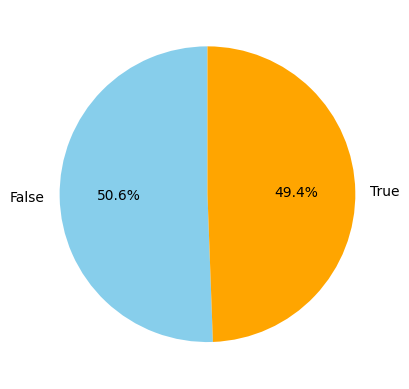

In [10]:
import matplotlib.pyplot as plt

# Crear una nueva columna basada en las condiciones (si es necesaria)
new_df['ambas'] = (new_df['Vulgar'] == 1)  | (new_df['Ofensivo'] == 1)

# Contar las ocurrencias de True/False en la columna 'huevo'
conteo_ambas = new_df['ambas'].value_counts()

# Crear el gráfico de pastel
plt.pie(conteo_ambas, labels=conteo_ambas.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.show()


In [11]:
conteo_ambas = new_df['ambas'].value_counts()
conteo_ambas

ambas
False    3059
True     2988
Name: count, dtype: int64